Please find my comments below - **I kindly ask that you do not move, modify, or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Hello Brandon,
 
 
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements.

**What Was Great:**
 
- Good data preprocessing.
- Correct join.
- Nice graphs.
- Good conclusions.

**Areas to Improve:**

- Do not forget to rerun and save whole project before submition. It helps to avoid non-obvious errors.
- To fully meet the project criteria, you’ll need to round up calls and internet.
- Consider to add graphs with messages/internet/revenue by month to make your analysis even more deeper.
- Please pay attention on "test statistical hypotheses" section. Ttest should not give us "nan"
    
You can find my detailed notes within your project.

Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄

</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Your corrections look great, you've improved your work significantly! 
    
I'm glad to say that your project has been accepted and you can go to the next sprint.
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')

internet = pd.read_csv('/datasets/megaline_internet.csv')

messages = pd.read_csv('/datasets/megaline_messages.csv')

plans = pd.read_csv('/datasets/megaline_plans.csv')

users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Print a sample of data for plans
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

I Don't see anything wrong with this dataset. All column names are how they are supposed to be, lowered and spaced out with a underscore. Also all the data is there and there's no missing values. I don't see anything that can be added to make it better as well. (Please correct me if I'm wrong, I feel like the dataset is fine as is)

## Fix data

[Fix obvious issues with the data given the initial observations.]

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

One thing that I see is that there are many missing variables in the churn_date column. Since there are only 34 values in that column, I was thinking of removing that column. As well as turning the reg_date column to a datetime datatype. 

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [7]:
users.drop('churn_date', axis=1)

,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf
...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf


In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

## Calls

In [10]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Print a sample of data for calls
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

I'm just doing the same as last dataframe and turning the call_date column to datetime type.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['call_month'] = calls['call_date'].dt.to_period('M')
calls_per_month = calls.groupby(['user_id', 'call_month']).size().reset_index(name='calls')
minutes_per_month = calls.groupby(['user_id', 'call_month'])['duration'].sum().reset_index(name='minutes')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  float64       
 4   call_month  137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Print a sample of data for messages
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Turning message_date column into a datetime type.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['message_month'] = messages['message_date'].dt.to_period('M')
messages_per_month = messages.groupby(['user_id', 'message_month']).size().reset_index(name='messages')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_month  76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [16]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Print a sample of data for the internet traffic
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Changing the session_date column to datetime type.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['session_month'] = internet['session_date'].dt.to_period('M')
data_per_month = internet.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index(name='data')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   mb_used        104825 non-null  float64       
 4   session_month  104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.0+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [19]:
# Print out the plan conditions and make sure they are clear for you
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice initial review!
</div>

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [20]:
# Calculate the number of calls made by each user per month. Save the result.
calls['call_month'] = calls['call_date'].dt.to_period('M')
calls_per_month = calls.groupby(['user_id', 'call_month']).size().reset_index(name='calls')
print(calls_per_month.head())

   user_id call_month  calls
0     1000    2018-12     16
1     1001    2018-08     27
2     1001    2018-09     49
3     1001    2018-10     65
4     1001    2018-11     64


In [21]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
minutes_per_month = calls.groupby(['user_id', 'call_month'])['duration'].sum().reset_index(name='minutes')
print(minutes_per_month.head())

   user_id call_month  minutes
0     1000    2018-12      124
1     1001    2018-08      182
2     1001    2018-09      315
3     1001    2018-10      393
4     1001    2018-11      426


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Based on project description: "For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute."
    
We need to use np.ceil() here.
</div>

In [22]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['message_month'] = messages['message_date'].dt.to_period('M')
messages_per_month = messages.groupby(['user_id', 'message_month']).size().reset_index(name='messages')
print(messages_per_month.head())

   user_id message_month  messages
0     1000       2018-12        11
1     1001       2018-08        30
2     1001       2018-09        44
3     1001       2018-10        53
4     1001       2018-11        36


In [23]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['session_month'] = internet['session_date'].dt.to_period('M')
data_per_month = internet.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index(name='data')
print(data_per_month.head())

   user_id session_month      data
0     1000       2018-12   1901.47
1     1001       2018-08   6919.15
2     1001       2018-09  13314.82
3     1001       2018-10  22330.49
4     1001       2018-11  18504.30


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Based on project description: "For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes."
    
We need to convert Mb to Gb and use np.ceil() here.
</div>

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [24]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
usage_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'call_month'], how='outer')
usage_data = pd.merge(usage_data, messages_per_month, left_on=['user_id', 'call_month'], right_on=['user_id', 'message_month'], how='outer')
usage_data = pd.merge(usage_data, data_per_month, left_on=['user_id', 'call_month'], right_on=['user_id', 'session_month'], how='outer')
users_subset = users[['user_id', 'plan']]
users_with_plan = users_subset.merge(plans, left_on='plan', right_on='plan_name', how='left')
usage_data.head()

,user_id,call_month,calls,minutes,message_month,messages,session_month,data
0,1000,2018-12,16.0,124.0,2018-12,11.0,2018-12,1901.47
1,1001,2018-08,27.0,182.0,2018-08,30.0,2018-08,6919.15
2,1001,2018-09,49.0,315.0,2018-09,44.0,2018-09,13314.82
3,1001,2018-10,65.0,393.0,2018-10,53.0,2018-10,22330.49
4,1001,2018-11,64.0,426.0,2018-11,36.0,2018-11,18504.30


In [25]:
# Add the plan information
users_subset = users[['user_id', 'plan']]
users_with_plan = users_subset.merge(plans, left_on='plan', right_on='plan_name', how='left')
usage_data = usage_data.merge(users_with_plan, on='user_id', how='left')
print(usage_data.head())

   user_id call_month  calls  minutes message_month  messages session_month  \
0     1000    2018-12   16.0    124.0       2018-12      11.0       2018-12   
1     1001    2018-08   27.0    182.0       2018-08      30.0       2018-08   
2     1001    2018-09   49.0    315.0       2018-09      44.0       2018-09   
3     1001    2018-10   65.0    393.0       2018-10      53.0       2018-10   
4     1001    2018-11   64.0    426.0       2018-11      36.0       2018-11   

       data      plan  messages_included  mb_per_month_included  \
0   1901.47  ultimate               1000                  30720   
1   6919.15      surf                 50                  15360   
2  13314.82      surf                 50                  15360   
3  22330.49      surf                 50                  15360   
4  18504.30      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7     

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [26]:
# Calculate the monthly revenue for each user
def calculate_monthly_revenue(row):
    revenue = row['usd_monthly_pay'] + \
              max(0, row['minutes'] - row['minutes_included']) * row['usd_per_minute'] + \
              max(0, row['messages'] - row['messages_included']) * row['usd_per_message'] + \
              max(0, row['data'] - row['mb_per_month_included']) / 1024 * row['usd_per_gb']
    return revenue

usage_data['monthly_revenue'] = usage_data.apply(calculate_monthly_revenue, axis=1)
print(usage_data.head())

   user_id call_month  calls  minutes message_month  messages session_month  \
0     1000    2018-12   16.0    124.0       2018-12      11.0       2018-12   
1     1001    2018-08   27.0    182.0       2018-08      30.0       2018-08   
2     1001    2018-09   49.0    315.0       2018-09      44.0       2018-09   
3     1001    2018-10   65.0    393.0       2018-10      53.0       2018-10   
4     1001    2018-11   64.0    426.0       2018-11      36.0       2018-11   

       data      plan  messages_included  mb_per_month_included  \
0   1901.47  ultimate               1000                  30720   
1   6919.15      surf                 50                  15360   
2  13314.82      surf                 50                  15360   
3  22330.49      surf                 50                  15360   
4  18504.30      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7     

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

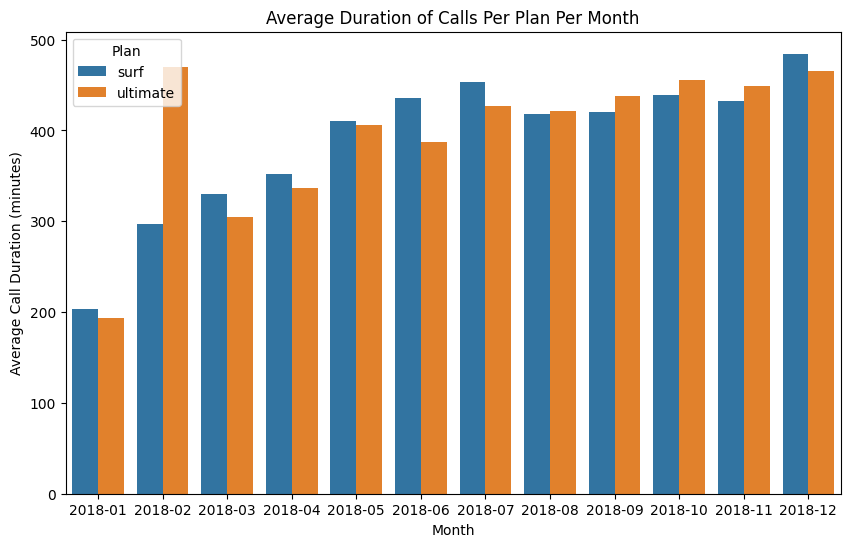

In [27]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_duration = usage_data.groupby(['plan', 'call_month'])['minutes'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_duration, x='call_month', y='minutes', hue='plan')
plt.title('Average Duration of Calls Per Plan Per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.legend(title='Plan')
plt.show()

No handles with labels found to put in legend.


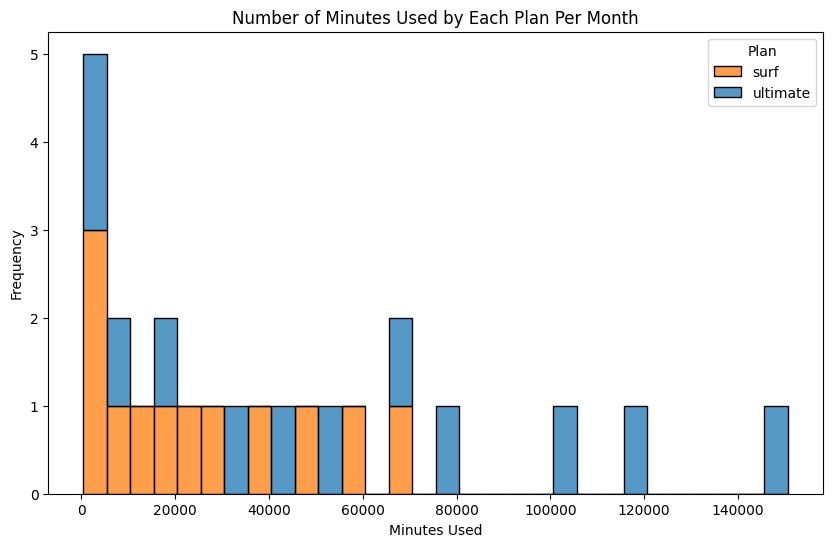

In [28]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
monthly_usage = usage_data.groupby(['plan', 'call_month'])['minutes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(data=monthly_usage, x='minutes', hue='plan', multiple='stack', bins=30)
plt.title('Number of Minutes Used by Each Plan Per Month')
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')
plt.legend(title='Plan')
legend_labels = monthly_usage['plan'].unique()
plt.legend(title='Plan', labels=legend_labels)

plt.show()


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [29]:
# Calculate the mean and the variance of the monthly call duration
monthly_stats = usage_data.groupby('call_month')['minutes'].agg(['mean', 'var']).reset_index()
monthly_stats.columns = ['call_month', 'mean_duration', 'variance_duration']
print(monthly_stats)


   call_month  mean_duration  variance_duration
0     2018-01     196.666667       13135.866667
1     2018-02     366.333333       56978.380952
2     2018-03     321.171429       43378.499160
3     2018-04     347.197183       45620.531992
4     2018-05     409.125000       52828.673544
5     2018-06     420.361702       42344.746809
6     2018-07     444.944134       63782.244052
7     2018-08     418.956522       52363.369280
8     2018-09     425.942238       48325.605347
9     2018-10     443.988131       50314.047478
10    2018-11     437.570720       52021.061529
11    2018-12     478.269565       60020.023037


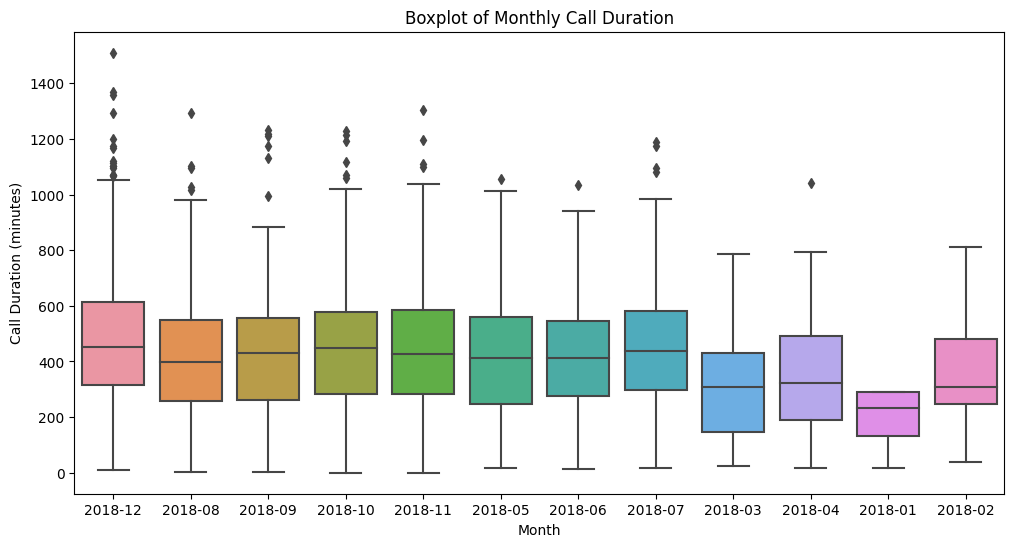

In [30]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='call_month', y='minutes', data=usage_data)
plt.title('Boxplot of Monthly Call Duration')
plt.xlabel('Month')
plt.ylabel('Call Duration (minutes)')
plt.show()

It seems that the ultimate plan users use much more time when calling than the surf plan. Since the ultimate plan has a lot more minutes then the surf plan, the users tend to not worry about their time as much since they have much more than the other plan.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good analysis!
</div>

### Messages

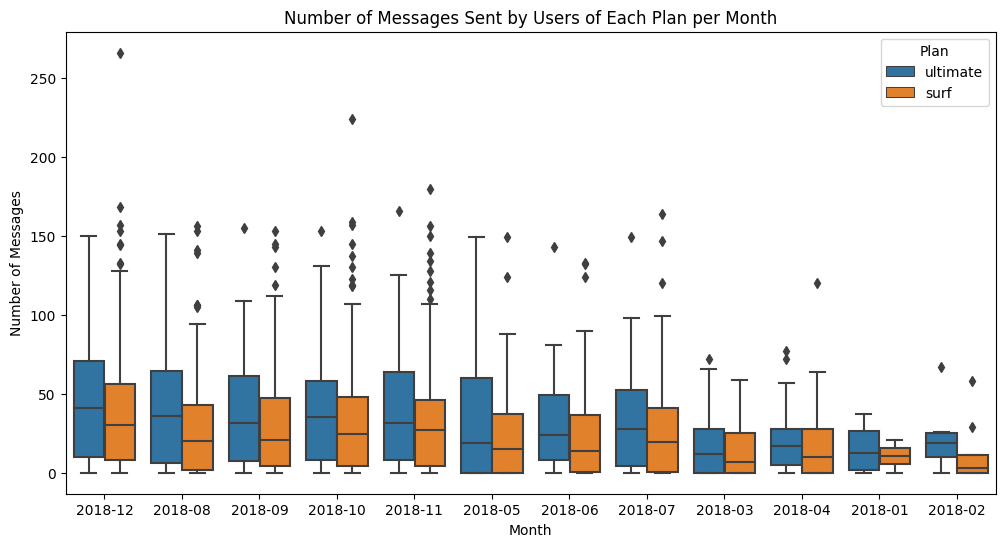

In [31]:
# Compare the number of messages users of each plan tend to send each month
user_messages_per_month = usage_data.groupby(['user_id', 'plan', 'call_month'])['messages'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.boxplot(x='call_month', y='messages', hue='plan', data=user_messages_per_month)
plt.title('Number of Messages Sent by Users of Each Plan per Month')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.legend(title='Plan')
plt.show()

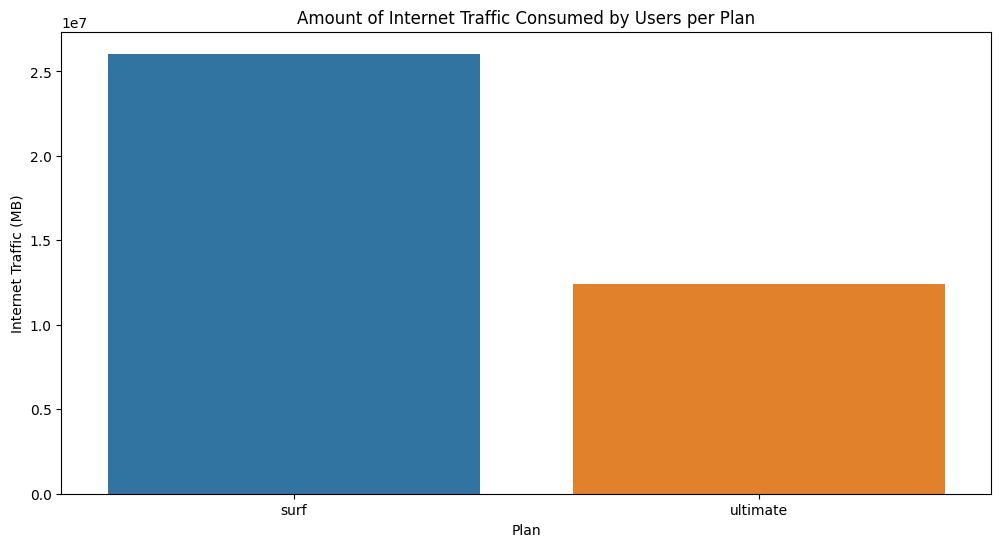

In [32]:
# Compare the amount of internet traffic consumed by users per plan
usage_data.rename(columns={'data': 'internet_traffic'}, inplace=True)
internet_traffic_per_plan = usage_data.groupby('plan')['internet_traffic'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='plan', y='internet_traffic', data=internet_traffic_per_plan)
plt.title('Amount of Internet Traffic Consumed by Users per Plan')
plt.xlabel('Plan')
plt.ylabel('Internet Traffic (MB)')
plt.show()

So it seems that the surf plan users like to use messaging more, and the ultimate plan calls more than messages.

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Ok, but it's better to add graph with messages by month (like in calls).
</div>

### Internet

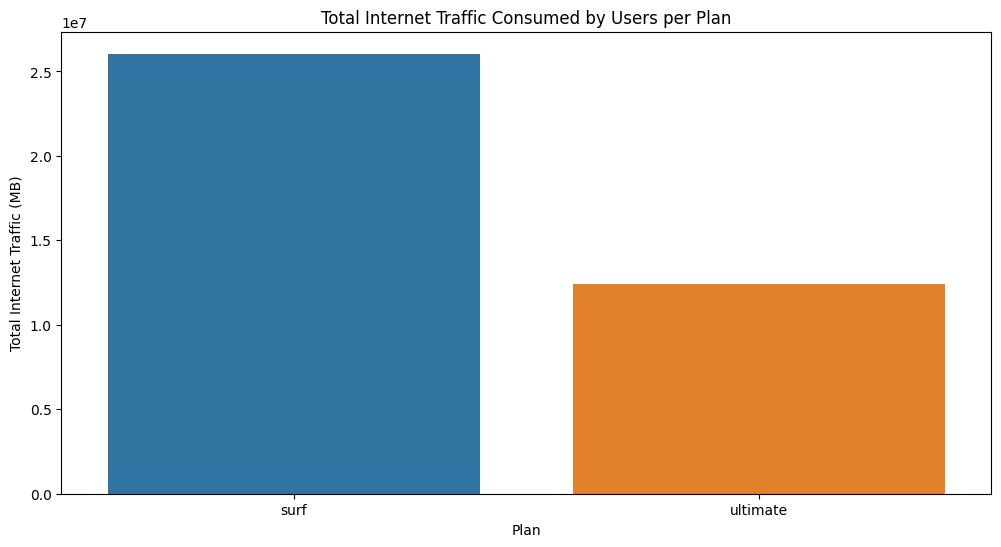

       plan  internet_traffic
0      surf       26046179.93
1  ultimate       12394583.78


In [33]:
internet_traffic_per_plan = usage_data.groupby('plan')['internet_traffic'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='plan', y='internet_traffic', data=internet_traffic_per_plan)
plt.title('Total Internet Traffic Consumed by Users per Plan')
plt.xlabel('Plan')
plt.ylabel('Total Internet Traffic (MB)')
plt.show()
print(internet_traffic_per_plan)

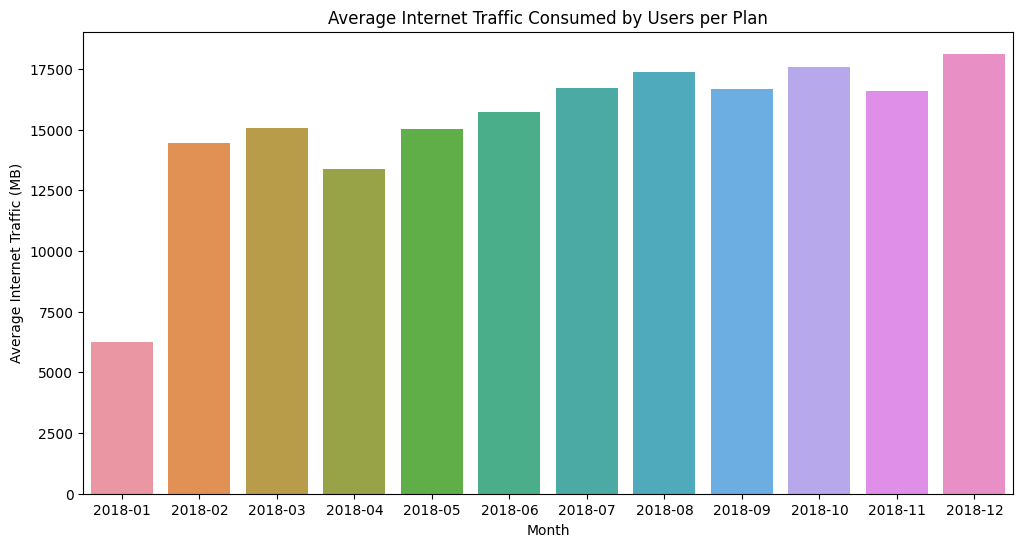

   call_month  internet_traffic
0     2018-01       6237.015000
1     2018-02      14461.289333
2     2018-03      15051.524000
3     2018-04      13396.641429
4     2018-05      15021.568155
5     2018-06      15726.824029
6     2018-07      16733.660562
7     2018-08      17388.512599
8     2018-09      16665.775217
9     2018-10      17564.754611
10    2018-11      16594.432594
11    2018-12      18130.440763


In [34]:
# Plot Average Internet Traffic per User per Plan
average_internet_traffic = usage_data.groupby('call_month')['internet_traffic'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='call_month', y='internet_traffic', data=average_internet_traffic)
plt.title('Average Internet Traffic Consumed by Users per Plan')
plt.xlabel('Month')
plt.ylabel('Average Internet Traffic (MB)')
plt.show()
print(average_internet_traffic)

Users on the ultimate plan consume significantly more internet traffic on average plus it has higher total internet traffic. Users on the ultimate plan consume more internet traffic both on an individual and cumulative basis compared to users on the surf plan.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Ok, but it's better to add graph with internet by month (like in calls).
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We need to compare plans, so it's better to plot surf and ultimate on the same graph.
</div>

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

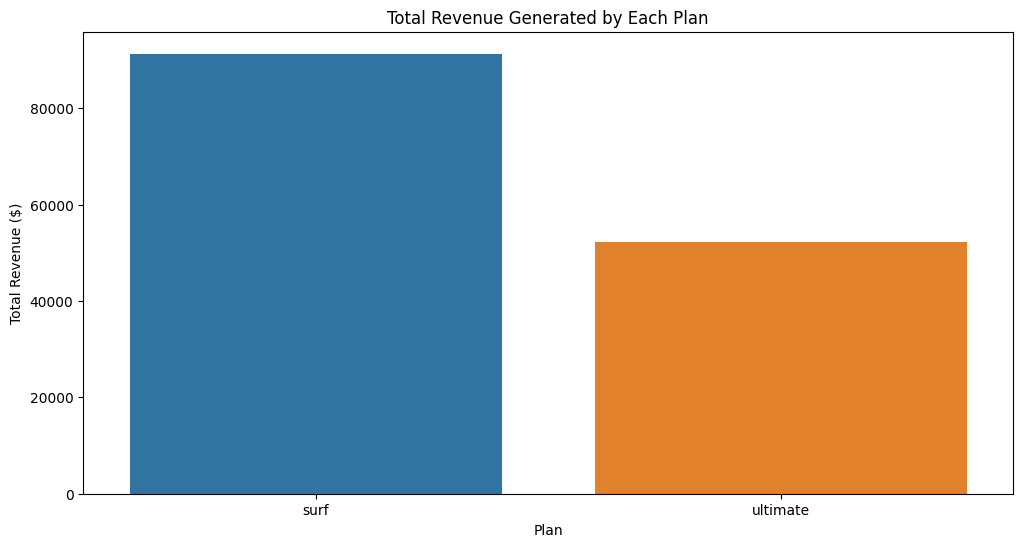

       plan  monthly_revenue
0      surf     91279.386738
1  ultimate     52203.577344


In [35]:

total_revenue_per_plan = usage_data.groupby('plan')['monthly_revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='plan', y='monthly_revenue', data=total_revenue_per_plan)
plt.title('Total Revenue Generated by Each Plan')
plt.xlabel('Plan')
plt.ylabel('Total Revenue ($)')
plt.show()
print(total_revenue_per_plan)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Seems there is a little error here =)
</div>

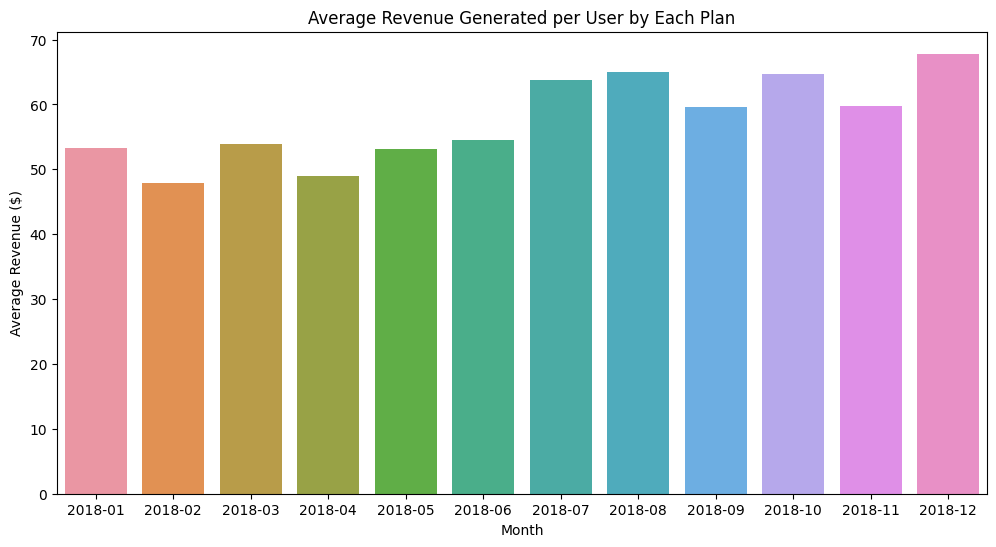

In [36]:
average_revenue_per_user = usage_data.groupby('call_month')['monthly_revenue'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='call_month', y='monthly_revenue', data=average_revenue_per_user)
plt.title('Average Revenue Generated per User by Each Plan')
plt.xlabel('Month')
plt.ylabel('Average Revenue ($)')
plt.show()

The ultimate plan generates a little less revenue compared to the surf plan but the ultimate plan's average revenue per user is higher, suggesting it is more profit per customer.

[Formulate conclusions about how the revenue differs between the plans.]

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Our recommendation is to add graph with revenue by month (like in calls).
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We need to compare plans, so it's better to plot surf and ultimate revenue by month on the same graph.
</div>

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [37]:
# Test the hypotheses
revenue_ultimate = usage_data[usage_data['plan'] == 'ultimate']['monthly_revenue']
revenue_surf = usage_data[usage_data['plan'] == 'surf']['monthly_revenue']
t_stat, p_value = stats.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between the average revenues of ultimate and surf plans.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between the average revenues of ultimate and surf plans.")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Reject the null hypothesis - There is a significant difference between the average revenues of ultimate and surf plans.
T-statistic: 10.795959503343525, P-value: 2.1316334794873735e-26


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [38]:
# Test the hypotheses
city = pd.merge(usage_data, users[['user_id', 'city']], on='user_id')
revenue_ny_nj = city[city['city'].str.contains('NY-NJ')]['monthly_revenue']
revenue_others = city[~city['city'].str.contains('NY-NJ')]['monthly_revenue']
t_stat, p_value = stats.ttest_ind(revenue_ny_nj, revenue_others)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between the average revenues of NY-NJ and other regions.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between the average revenues of NY-NJ and other regions.")

T-statistic: -2.2145097715800617, P-value: 0.026890462150592907
Reject the null hypothesis - There is a significant difference between the average revenues of NY-NJ and other regions.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Please check calculations: ttest give us "nan" when there is problem in the data (for example NaNs).
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Overall the two plans are both used everywhere, there is no area of the country that uses megaline more than another area. Also the surf plan rakes in more revenue, but the ultimate plan makes more off a single user. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice final conclusion =)
</div>